In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import warnings
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import pickle
import os
import shutil
warnings.filterwarnings("ignore") 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/jfk_weather_cleaned.csv",na_values="?")
data.head()

,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,01-01-2010 01:00,6.0,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.0,1.0,0,1,0
1,01-01-2010 02:00,6.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.0,1.0,0,1,0
2,01-01-2010 03:00,5.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.0,1.0,0,1,0
3,01-01-2010 04:00,5.0,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.0,1.0,0,1,0
4,01-01-2010 05:00,5.0,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.0,1.0,0,1,0


In [ ]:
data.describe()

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
count,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,7.511900e+04,75119.000000,75119.000000,75119.000000
mean,9.205796,55.355509,49.333830,42.422223,64.809942,11.252965,30.005124,30.026116,0.004574,30.025137,-0.166465,2.867949e-02,0.503468,0.490835,0.005698
std,2.209374,17.393210,16.178678,19.577775,19.899904,6.099392,0.234245,0.233949,0.033581,0.234212,0.629050,7.587989e-01,0.499991,0.499919,0.075268
min,0.000000,1.000000,-1.000000,-19.000000,8.000000,0.000000,28.490000,28.540000,0.000000,28.510000,-1.000000,-1.000000e+00,0.000000,0.000000,0.000000
25%,10.000000,42.000000,36.000000,27.000000,49.000000,7.000000,29.860000,29.880000,0.000000,29.880000,-0.766044,-7.660440e-01,0.000000,0.000000,0.000000
50%,10.000000,56.000000,50.000000,44.000000,66.000000,10.000000,30.000000,30.020000,0.000000,30.020000,-0.173648,6.120000e-17,1.000000,0.000000,0.000000
75%,10.000000,70.000000,63.000000,59.000000,82.000000,15.000000,30.150000,30.170000,0.000000,30.170000,0.342020,7.660440e-01,1.000000,1.000000,0.000000
max,10.000000,102.000000,85.000000,84.000000,100.000000,53.000000,30.830000,30.850000,2.410000,30.850000,1.000000,1.000000e+00,1.000000,1.000000,1.000000


Check to see and impute any null values

In [ ]:
data.isnull().sum()

DATE                          0
HOURLYVISIBILITY              0
HOURLYDRYBULBTEMPF            0
HOURLYWETBULBTEMPF            0
HOURLYDewPointTempF           0
HOURLYRelativeHumidity        0
HOURLYWindSpeed               0
HOURLYStationPressure         0
HOURLYSeaLevelPressure        0
HOURLYPrecip                  0
HOURLYAltimeterSetting        0
HOURLYWindDirectionSin        0
HOURLYWindDirectionCos        0
HOURLYPressureTendencyIncr    0
HOURLYPressureTendencyDecr    0
HOURLYPressureTendencyCons    0
dtype: int64

EDA Analysis

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(data, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Before Analyzing furthur lets scale our data and divide it into Target and Data accordingly

In [ ]:
scale = StandardScaler()
X = data.drop(['DATE','HOURLYVISIBILITY'],axis=1)
y = data['HOURLYVISIBILITY']

In [ ]:
X_scaled = scale.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [ ]:
X_scaled

,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,-1.285309,-1.071407,-0.583432,1.366350,-1.844945,-0.149949,-0.154377,0.161577,-0.150024,0.264630,1.280085,-1.006960,1.018502,-0.075699
1,-1.285309,-1.009597,-0.532353,1.567358,-1.844945,-0.149949,-0.154377,0.459363,-0.150024,0.264630,1.280085,-1.006960,1.018502,-0.075699
2,-1.285309,-1.009597,-0.532353,1.567358,-1.844945,-0.149949,-0.154377,-0.136210,-0.150024,0.264630,1.280085,-1.006960,1.018502,-0.075699
3,-1.285309,-1.009597,-0.532353,1.567358,-1.844945,-0.235330,-0.239866,-0.136210,-0.235417,0.264630,1.280085,-1.006960,1.018502,-0.075699
4,-1.285309,-1.071407,-0.583432,1.366350,-1.844945,-0.320712,-0.282611,-0.136210,-0.320810,0.264630,1.280085,-1.006960,1.018502,-0.075699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75114,1.186936,1.462810,1.510793,1.165343,-1.353089,-0.021877,-0.026143,-0.136210,-0.021933,-0.953157,-0.884914,0.993088,-0.981834,-0.075699
75115,0.784477,1.215569,1.357557,1.768365,0.286430,-0.064567,-0.068888,34.407033,-0.064630,1.286476,0.971759,0.993088,-0.981834,-0.075699
75116,0.899466,1.277379,1.408636,1.567358,-1.844945,0.063505,0.059346,0.161577,0.063460,0.264630,1.280085,0.993088,-0.981834,-0.075699
75117,0.956960,1.339189,1.408636,1.466854,-1.025185,-0.021877,-0.026143,-0.136210,-0.021933,1.482417,0.809322,0.993088,-0.981834,-0.075699


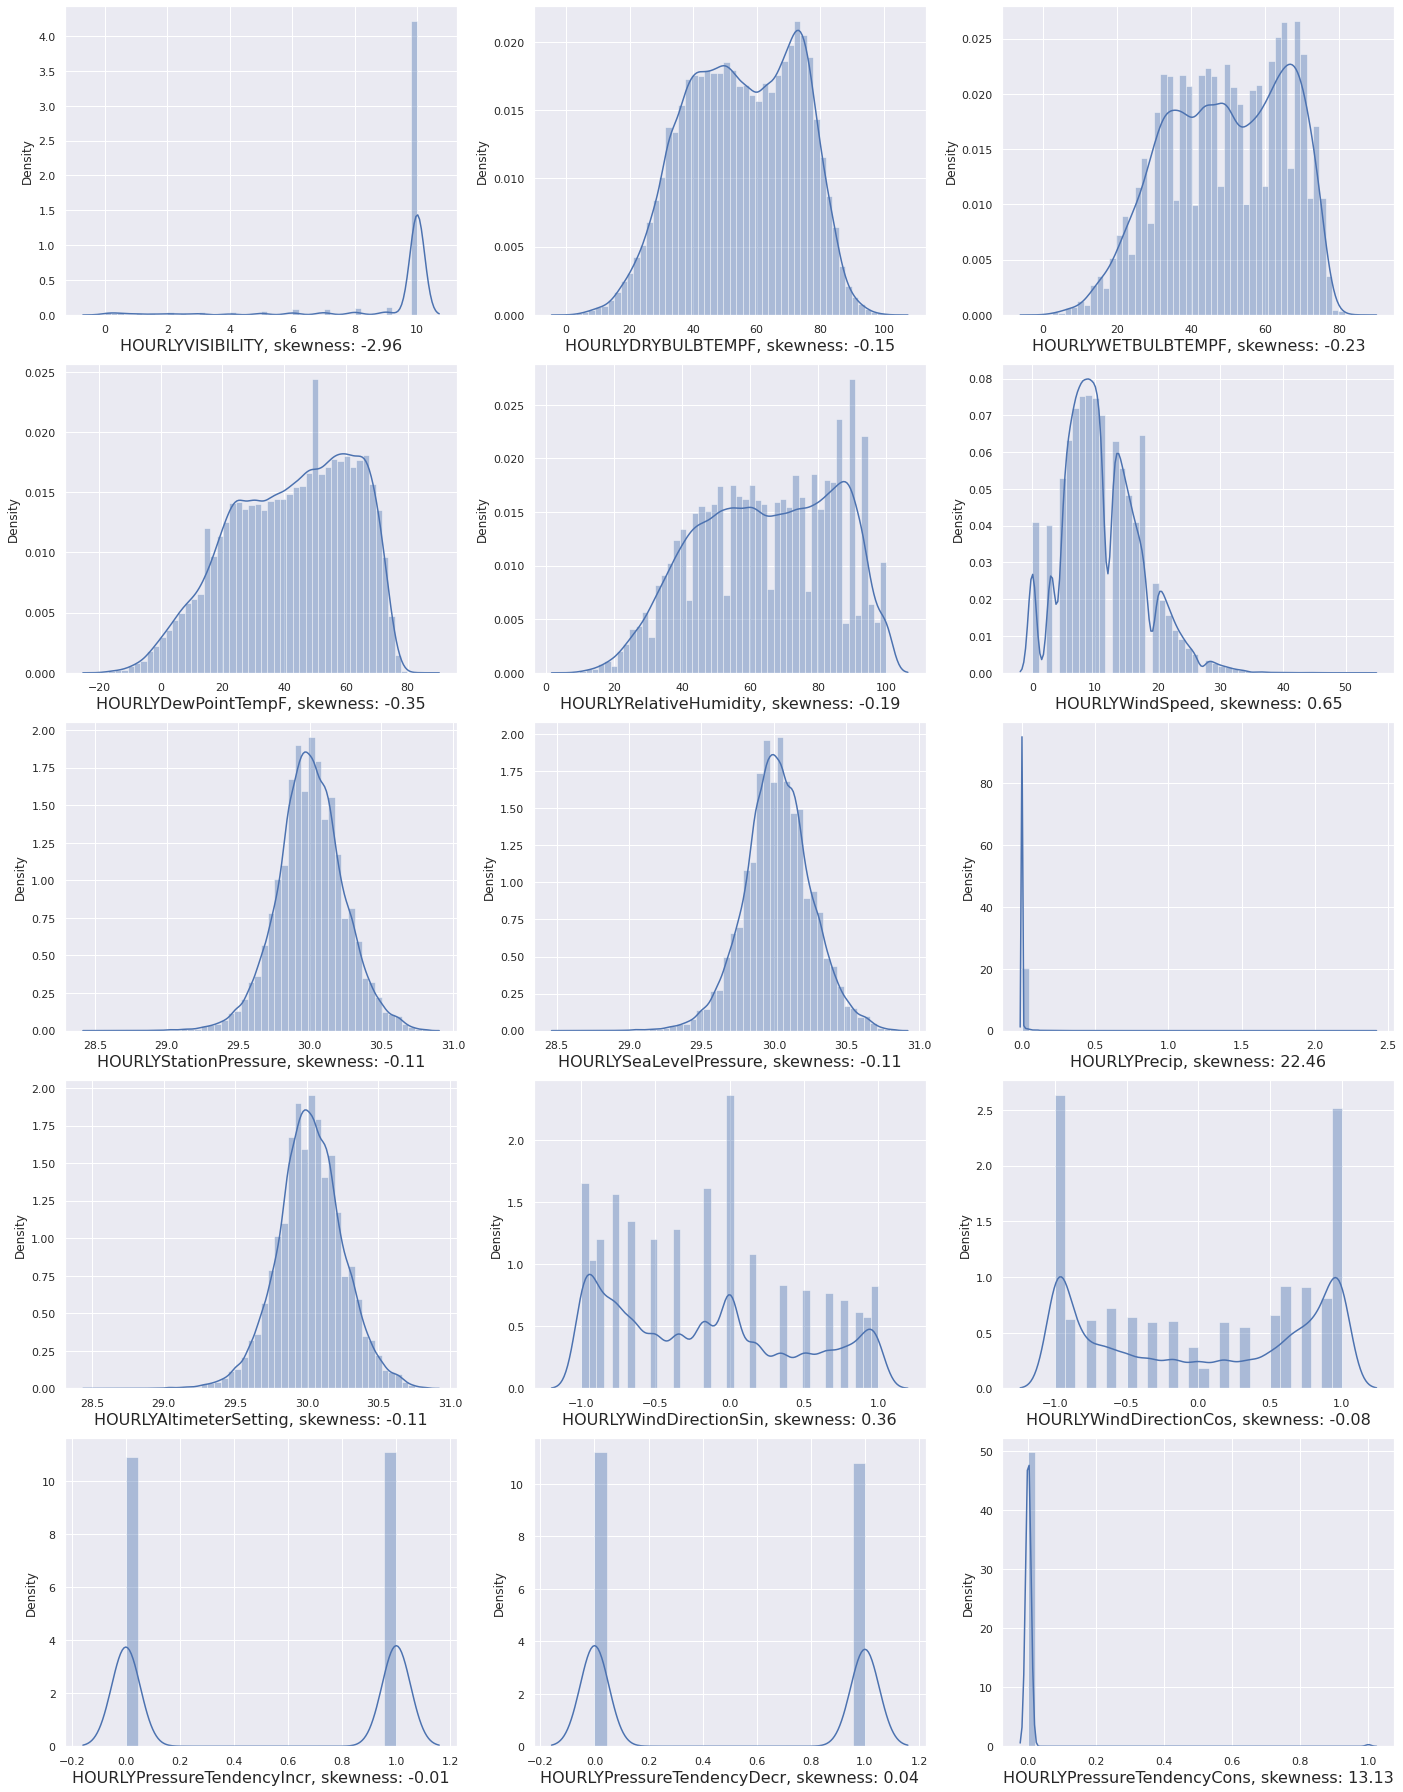

In [ ]:
sns.set()
%matplotlib inline
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data.drop(['DATE'],axis=1):
    ax = plt.subplot(5,3,plotnumber)
    sns.distplot(data[column])
    s = round(skew(data[column]), 2) 
    plt.xlabel("{}, skewness: {}".format(column, s),fontsize=16)
    plotnumber+=1
plt.tight_layout()
plt.show()

Since some of the columns are not following normal distribution curve, We will try to use either square root or log transformations. But since most of the columns have very low skewness, its better to remove columns like precipitation. But before that lets analyze the correlation matrix

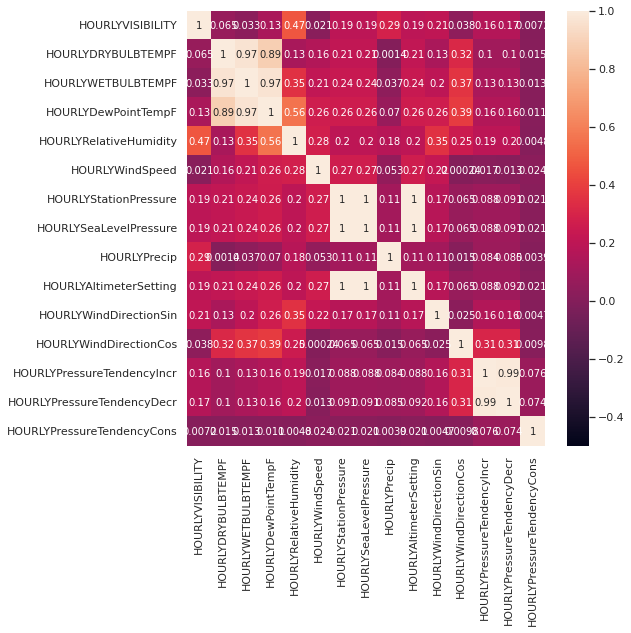

In [ ]:
plt.figure(figsize=(8,8))
plt_data = data.drop(['DATE'],axis=1)
sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True)

From the correlation heatmap, we can see that our target variable has a decent correlation with Hourly Precipitation, so lets leave it like that. But it can also be seen that there is a clear correlation between some other columns, so lets remove them

In [ ]:
X_ = X_scaled.drop(['HOURLYWETBULBTEMPF','HOURLYDewPointTempF','HOURLYStationPressure'],axis=1)
X_

,HOURLYDRYBULBTEMPF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,-1.285309,1.366350,-1.844945,-0.154377,0.161577,-0.150024,0.264630,1.280085,-1.006960,1.018502,-0.075699
1,-1.285309,1.567358,-1.844945,-0.154377,0.459363,-0.150024,0.264630,1.280085,-1.006960,1.018502,-0.075699
2,-1.285309,1.567358,-1.844945,-0.154377,-0.136210,-0.150024,0.264630,1.280085,-1.006960,1.018502,-0.075699
3,-1.285309,1.567358,-1.844945,-0.239866,-0.136210,-0.235417,0.264630,1.280085,-1.006960,1.018502,-0.075699
4,-1.285309,1.366350,-1.844945,-0.282611,-0.136210,-0.320810,0.264630,1.280085,-1.006960,1.018502,-0.075699
...,...,...,...,...,...,...,...,...,...,...,...
75114,1.186936,1.165343,-1.353089,-0.026143,-0.136210,-0.021933,-0.953157,-0.884914,0.993088,-0.981834,-0.075699
75115,0.784477,1.768365,0.286430,-0.068888,34.407033,-0.064630,1.286476,0.971759,0.993088,-0.981834,-0.075699
75116,0.899466,1.567358,-1.844945,0.059346,0.161577,0.063460,0.264630,1.280085,0.993088,-0.981834,-0.075699
75117,0.956960,1.466854,-1.025185,-0.026143,-0.136210,-0.021933,1.482417,0.809322,0.993088,-0.981834,-0.075699


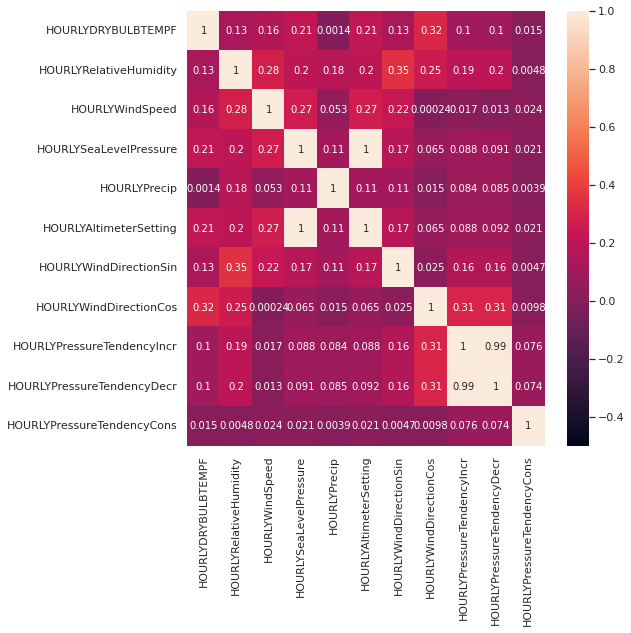

In [ ]:
plt.figure(figsize=(8,8))
plt_data = X_
sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True)

Still some columns have a high correlation, So lets also remove columns in a way that the correlations minimizes

In [ ]:
X_ = X_.drop(['HOURLYAltimeterSetting','HOURLYPressureTendencyIncr','HOURLYPressureTendencyDecr'],axis=1)
X_

,HOURLYDRYBULBTEMPF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyCons
0,-1.285309,1.366350,-1.844945,-0.154377,0.161577,0.264630,1.280085,-0.075699
1,-1.285309,1.567358,-1.844945,-0.154377,0.459363,0.264630,1.280085,-0.075699
2,-1.285309,1.567358,-1.844945,-0.154377,-0.136210,0.264630,1.280085,-0.075699
3,-1.285309,1.567358,-1.844945,-0.239866,-0.136210,0.264630,1.280085,-0.075699
4,-1.285309,1.366350,-1.844945,-0.282611,-0.136210,0.264630,1.280085,-0.075699
...,...,...,...,...,...,...,...,...
75114,1.186936,1.165343,-1.353089,-0.026143,-0.136210,-0.953157,-0.884914,-0.075699
75115,0.784477,1.768365,0.286430,-0.068888,34.407033,1.286476,0.971759,-0.075699
75116,0.899466,1.567358,-1.844945,0.059346,0.161577,0.264630,1.280085,-0.075699
75117,0.956960,1.466854,-1.025185,-0.026143,-0.136210,1.482417,0.809322,-0.075699


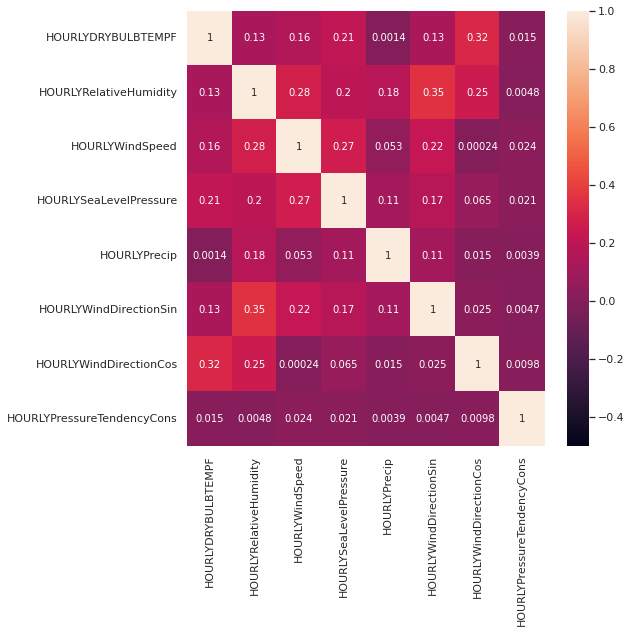

In [ ]:
plt.figure(figsize=(8,8))
plt_data = X_
sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True)

Now our correlation graph is perfect, lets now move to creating various regression models

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_, y, train_size=0.8, shuffle=False)

In [ ]:
X1 = X_[:]
X1["HOURLYVISIBILITY"] = y
X1

,HOURLYDRYBULBTEMPF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyCons,HOURLYVISIBILITY
0,-1.285309,1.366350,-1.844945,-0.154377,0.161577,0.264630,1.280085,-0.075699,6.0
1,-1.285309,1.567358,-1.844945,-0.154377,0.459363,0.264630,1.280085,-0.075699,6.0
2,-1.285309,1.567358,-1.844945,-0.154377,-0.136210,0.264630,1.280085,-0.075699,5.0
3,-1.285309,1.567358,-1.844945,-0.239866,-0.136210,0.264630,1.280085,-0.075699,5.0
4,-1.285309,1.366350,-1.844945,-0.282611,-0.136210,0.264630,1.280085,-0.075699,5.0
...,...,...,...,...,...,...,...,...,...
75114,1.186936,1.165343,-1.353089,-0.026143,-0.136210,-0.953157,-0.884914,-0.075699,10.0
75115,0.784477,1.768365,0.286430,-0.068888,34.407033,1.286476,0.971759,-0.075699,4.0
75116,0.899466,1.567358,-1.844945,0.059346,0.161577,0.264630,1.280085,-0.075699,10.0
75117,0.956960,1.466854,-1.025185,-0.026143,-0.136210,1.482417,0.809322,-0.075699,10.0


Linear Regression


R2 Score: 0.3088916297729465


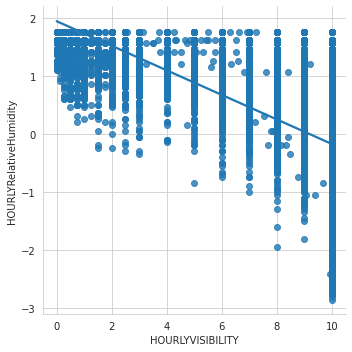

In [ ]:
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)

sns.set_style('whitegrid')
sns.lmplot(x ='HOURLYVISIBILITY', y ='HOURLYRelativeHumidity', data = X1)

r2 = r2_score(y_test,y_pred)
print(f"\nR2 Score: {r2}")
# sns.pairplot(X1, x_vars=["HOURLYDRYBULBTEMPF",	"HOURLYRelativeHumidity",	"HOURLYWindSpeed",	"HOURLYSeaLevelPressure",	"HOURLYPrecip",	"HOURLYWindDirectionSin",	"HOURLYWindDirectionCos",	"HOURLYPressureTendencyCons"], y_vars = "HOURLYVISIBILITY", size = 7, aspect = 0.7, kind = "reg" )

Polynomial Regression

In [ ]:
poly = PolynomialFeatures()
X_poly = poly.fit_transform(x_train)
poly.fit(x_train,y_train)
model = LinearRegression()
model.fit(X_poly, y_train)
y_pred = model.predict(poly.fit_transform(x_test))

# plt.figure(figsize=(10, 6))
# plt.title("Polynomial Regression", size=16)
# plt.scatter(x_test["HOURLYRelativeHumidity"], y_test)
# plt.plot(x_test, y_pred, c="red")
# plt.show()

r2 = r2_score(y_test,y_pred)
print(f"\nR2 Score: {r2}")


R2 Score: 0.41007788739671447


Decision Tree Regressor

Using Grid Search to find best parameters for Decision Tree Regressor

In [ ]:
def get_best_params_for_DecisionTreeRegressor(train_x, train_y):
    try:
        DecisionTreeReg = DecisionTreeRegressor()
        param_grid_decisionTree = {"criterion": ["mse", "friedman_mse", "mae"],
                          "splitter": ["best", "random"],
                          "max_features": ["auto", "sqrt", "log2"],
                          'max_depth': range(2, 16, 2),
                          'min_samples_split': range(2, 16, 2)
                          }
        grid = GridSearchCV(DecisionTreeReg, param_grid_decisionTree, verbose=3,cv=2)
        grid.fit(train_x, train_y)

        criterion = grid.best_params_['criterion']
        splitter = grid.best_params_['splitter']
        max_features = grid.best_params_['max_features']
        max_depth  = grid.best_params_['max_depth']
        min_samples_split = grid.best_params_['min_samples_split']

        return criterion, splitter, max_features, max_depth, min_samples_split
    except Exception as e:
      print(e)

In [ ]:
criterion, splitter, max_features, max_depth, min_samples_split = get_best_params_for_DecisionTreeRegressor(x_train, y_train)

Fitting 2 folds for each of 882 candidates, totalling 1764 fits
[CV 1/2] END criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best;, score=0.539 total time=   0.0s
[CV 2/2] END criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best;, score=0.488 total time=   0.0s
[CV 1/2] END criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=random;, score=0.102 total time=   0.0s
[CV 2/2] END criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=random;, score=0.048 total time=   0.0s
[CV 1/2] END criterion=mse, max_depth=2, max_features=auto, min_samples_split=4, splitter=best;, score=0.539 total time=   0.0s
[CV 2/2] END criterion=mse, max_depth=2, max_features=auto, min_samples_split=4, splitter=best;, score=0.488 total time=   0.0s
[CV 1/2] END criterion=mse, max_depth=2, max_features=auto, min_samples_split=4, splitter=random;, score=0.346 total time=   0.0s
[CV 2/2] END criterion=mse, max_de

In [ ]:
# criterion, splitter, max_features, max_depth, min_samples_split
print("Best Criterion: ", criterion)
print("Best Splitter: ", splitter)
print("Best number of features: ", max_features)
print("Best Depth: ", max_depth)
print("Best Min Sample Split: ", min_samples_split)

Best Criterion:  mse
Best Splitter:  best
Best number of features:  auto
Best Depth:  6
Best Min Sample Split:  2


In [ ]:
decisionTreeReg = DecisionTreeRegressor(criterion="mse",splitter="best",max_features="auto",max_depth=6,min_samples_split=2)
decisionTreeReg.fit(x_train, y_train)
y_pred = decisionTreeReg.predict(x_test)
r2 = r2_score(y_test,y_pred)
print(f"\nR2 Score: {r2}")


R2 Score: 0.12637498734822006


Support Vector Machines

In [ ]:
from sklearn import svm
list_kernel = ["linear", "rbf"]
for kern in list_kernel:
  print("Kernel :", kern)
  clf = svm.SVR(kernel=kern)
  y_pred = clf.fit(x_train, y_train).predict(x_test)
  mse = np.mean((clf.predict(x_test) - y_test) ** 2)
  # print("Mean squared error: %.2f" % np.mean((clf.predict(x_test) - y_test) ** 2))
  r2 = r2_score(y_test,y_pred)
  print(f"\nR2 Score: {r2}")
  # print('Variance score: %.2f' % clf.score(x_test, y_test))
  # print()

Kernel : linear

R2 Score: 0.04039864596330811
Kernel : rbf

R2 Score: 0.5762773021729313


XG Boost

Using GridSearch to find best parameters for XGBoost

In [ ]:
def get_best_params_for_xgboost(train_x,train_y):
    try:
        param_grid_xgboost = {

            'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]

        }
        grid= GridSearchCV(XGBRegressor(objective='reg:linear'),param_grid_xgboost, verbose=3,cv=5)
        grid.fit(train_x, train_y)
        learning_rate = grid.best_params_['learning_rate']
        max_depth = grid.best_params_['max_depth']
        n_estimators = grid.best_params_['n_estimators']

        return learning_rate, max_depth, n_estimators
    except Exception as e:
      print(e)

In [ ]:
learning_rate, max_depth, n_estimators = get_best_params_for_xgboost(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[14:15:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.644 total time=   0.5s
[14:15:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.546 total time=   0.5s
[14:15:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.663 total time=   0.4s
[14:15:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.638 total time=   0.5s
[14:15:58] WARNING: /workspace/src/objective/regressio

TypeError: ignored

In [ ]:
print("Best Learning Rate: ", learning_rate)
print("Best Max Depth: ", max_depth)
print("Best N Estimators: ", n_estimators)

Best Learning Rate:  0.1
Best Max Depth:  5
Best N Estimators:  100


In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.1,
                max_depth = 5, n_estimators = 100)
xg_reg.fit(x_train,y_train)
y_pred = xg_reg.predict(x_test)
r2 = r2_score(y_test,y_pred)
print(f"\nR2 Score: {r2}")

[16:01:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

R2 Score: 0.18201136360103887


Since for individual models we are not getting significant errors in the predicted values. We decided to change our approach from single model to a multimodel approach.

This will be done by first using K-Means clustering to divide the dataset into mutiple clusters and then using separate models for each cluster

In [ ]:
pip install kneed==0.5.1

In [ ]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn import svm

Finding Knee of the Cluster for optimal number of clusters

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_, y, train_size=0.7)

In [ ]:
def elbow_plot(data):
    wcss=[] #within-clusters-sum-of-squares
    try:
        for i in range (1,11):
            kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
            kmeans.fit(data)
            wcss.append(kmeans.inertia_)
        plt.plot(range(1,11),wcss)
        plt.title('The Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')
        plt.show()
        
        kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
        print('The optimum number of clusters is: '+ str(kn.knee))
        return kn.knee

    except Exception as e:
        print(e)

In [ ]:
model_directory='models/'
def save_model_(model,filename):
    try:
        path = os.path.join(model_directory,filename)
        if os.path.isdir(path):
            shutil.rmtree(model_directory)
            os.makedirs(path)
        else:
            os.makedirs(path)
        with open(path +'/' + filename+'.sav',
                  'wb') as f:
            pickle.dump(model, f)
        return 'success'
    except Exception as e:
        print(e)

In [ ]:
def create_clusters(data,number_of_clusters):
    data=data
    try:
        kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', random_state=42)
        y_kmeans=kmeans.fit_predict(data)
        save_model = save_model_(kmeans, 'KMeans') # saving the KMeans model to directory
                                                                                # passing 'Model' as the functions need three parameters
        data['Cluster']=y_kmeans  # create a new column in dataset for storing the cluster information
        return data
    except Exception as e:
        print(exec)

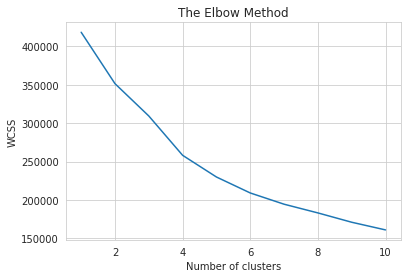

The optimum number of clusters is: 4


In [ ]:
number_of_clusters=elbow_plot(x_train)  #  using the elbow plot to find the number of optimum clusters

In [ ]:
x_train

,HOURLYDRYBULBTEMPF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyCons
58457,1.014454,0.964336,-1.844945,-0.667312,-0.13621,0.264630,1.280085,-0.075699
4415,1.014454,0.210558,-0.533330,0.016601,-0.13621,-1.112097,-0.696737,-0.075699
25929,-0.365404,0.763328,1.106189,0.358558,-0.13621,1.854339,-0.037796,-0.075699
70355,-1.170321,-0.392464,-1.353089,2.068342,-0.13621,-0.530224,-1.179114,-0.075699
59826,-0.537886,-0.543219,1.598045,0.743259,-0.13621,-0.953157,0.809322,-0.075699
...,...,...,...,...,...,...,...,...
34762,-0.882851,-0.342212,-0.041474,0.486792,-0.13621,-1.112097,-0.696737,-0.075699
29293,0.094548,-0.342212,1.106189,1.042472,-0.13621,1.482417,-0.884914,-0.075699
1232,-1.112827,-0.291960,0.614333,-0.239866,-0.13621,-1.325079,-0.037796,-0.075699
37703,-0.767863,-0.593471,-1.353089,1.256195,-0.13621,1.286476,0.971759,-0.075699


In [ ]:
# Divide the data into clusters
new_data = x_train[:]
new_data=create_clusters(x_train, number_of_clusters)
new_data

,HOURLYDRYBULBTEMPF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyCons,Cluster
58457,1.014454,0.964336,-1.844945,-0.667312,-0.13621,0.264630,1.280085,-0.075699,2
4415,1.014454,0.210558,-0.533330,0.016601,-0.13621,-1.112097,-0.696737,-0.075699,0
25929,-0.365404,0.763328,1.106189,0.358558,-0.13621,1.854339,-0.037796,-0.075699,2
70355,-1.170321,-0.392464,-1.353089,2.068342,-0.13621,-0.530224,-1.179114,-0.075699,0
59826,-0.537886,-0.543219,1.598045,0.743259,-0.13621,-0.953157,0.809322,-0.075699,1
...,...,...,...,...,...,...,...,...,...
34762,-0.882851,-0.342212,-0.041474,0.486792,-0.13621,-1.112097,-0.696737,-0.075699,1
29293,0.094548,-0.342212,1.106189,1.042472,-0.13621,1.482417,-0.884914,-0.075699,0
1232,-1.112827,-0.291960,0.614333,-0.239866,-0.13621,-1.325079,-0.037796,-0.075699,1
37703,-0.767863,-0.593471,-1.353089,1.256195,-0.13621,1.286476,0.971759,-0.075699,2


In [ ]:
#create a new column in the dataset consisting of the corresponding cluster assignments.
new_data['Labels']=y
new_data

,HOURLYDRYBULBTEMPF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyCons,Cluster,Labels
58457,1.014454,0.964336,-1.844945,-0.667312,-0.13621,0.264630,1.280085,-0.075699,2,10.0
4415,1.014454,0.210558,-0.533330,0.016601,-0.13621,-1.112097,-0.696737,-0.075699,0,10.0
25929,-0.365404,0.763328,1.106189,0.358558,-0.13621,1.854339,-0.037796,-0.075699,2,10.0
70355,-1.170321,-0.392464,-1.353089,2.068342,-0.13621,-0.530224,-1.179114,-0.075699,0,10.0
59826,-0.537886,-0.543219,1.598045,0.743259,-0.13621,-0.953157,0.809322,-0.075699,1,10.0
...,...,...,...,...,...,...,...,...,...,...
34762,-0.882851,-0.342212,-0.041474,0.486792,-0.13621,-1.112097,-0.696737,-0.075699,1,10.0
29293,0.094548,-0.342212,1.106189,1.042472,-0.13621,1.482417,-0.884914,-0.075699,0,10.0
1232,-1.112827,-0.291960,0.614333,-0.239866,-0.13621,-1.325079,-0.037796,-0.075699,1,10.0
37703,-0.767863,-0.593471,-1.353089,1.256195,-0.13621,1.286476,0.971759,-0.075699,2,10.0


In [ ]:
# getting the unique clusters from our dataset
list_of_clusters=new_data['Cluster'].unique()
print(list_of_clusters)

[2 0 1 3]


In [ ]:
def standardScalingData(X):
    scalar = StandardScaler()
    X_scaled = scalar.fit_transform(X)
    return X_scaled

In [ ]:
def get_best_model(x_train,y_train,x_test,y_test):
    try:
        result = []
        # create best model for Decision Tree Regressor
        decisionTreeReg = DecisionTreeRegressor(criterion="mse",splitter="best",max_features="auto",max_depth=6,min_samples_split=2)
        decisionTreeReg.fit(x_train, y_train)
        y_pred = decisionTreeReg.predict(x_test)
        decisionTreeReg_error = mean_squared_error(y_test,y_pred)
        result.append(decisionTreeReg_error)

        # create best model for XGBoost
        xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.1,
                max_depth = 5, n_estimators = 100)
        xg_reg.fit(x_train,y_train)
        y_pred = xg_reg.predict(x_test)
        prediction_xgboost_error = mean_squared_error(y_test,y_pred)
        result.append(prediction_xgboost_error)

        # create best model for SVM Regression
        list_kernel = ["rbf"]
        for kern in list_kernel:
          clf = svm.SVR(kernel=kern)
          y_pred = clf.fit(x_train, y_train).predict(x_test)
          prediction_svm_error = np.mean((clf.predict(x_test) - y_test) ** 2)
        result.append(prediction_svm_error)
        
        # create best model for Polynomial Regression
        poly = PolynomialFeatures()
        X_poly = poly.fit_transform(x_train)
        poly.fit(x_train,y_train)
        model = LinearRegression()
        model.fit(X_poly, y_train)
        y_pred = model.predict(poly.fit_transform(x_test))
        prediction_poly_error = mean_squared_error(y_test,y_pred)
        result.append(prediction_poly_error)

        print(result)

        #comparing all the models
        sorted_result = result[:]
        sorted_result.sort()

        min = sorted_result[0]
        ind = result.index(min)

        if ind == 0:
          return 'DecisionTreeReg',decisionTreeReg
        elif ind == 1:
          return 'XGBoost', xg_reg
        elif ind == 2:
          return 'SVM', clf
        else:
          return 'Poly', model

    except Exception as e:
        print(e)

In [ ]:
for i in list_of_clusters:
    cluster_data=new_data[new_data['Cluster']==i] # filter the data for one cluster

    # Prepare the feature and Label columns
    cluster_features=cluster_data.drop(['Labels','Cluster'],axis=1)
    cluster_label= cluster_data['Labels']

    # splitting the data into training and test set for each cluster one by one
    train_x, test_x, train_y, test_y = train_test_split(cluster_features, cluster_label, test_size=1 / 3)

    x_train_scaled = standardScalingData(train_x)
    x_test_scaled = standardScalingData(test_x)

    #getting the best model for each of the clusters
    best_model_name,best_model=get_best_model(x_train_scaled,train_y,x_test_scaled,test_y)

    save_model = save_model_(best_model,best_model_name+str(i))

print('Successful End of Training')

[17:09:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[3.2276681447710285, 2.9175835428959003, 4.025773089753407, 19421.807376420755]
[17:09:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[2.8036627113605324, 2.5272176780990137, 3.416694778285685, 3310.7076100367176]
[17:09:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.39583941876916967, 0.35898640030694157, 0.4943090213473558, 380301.99795636936]
[17:09:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[4.223704093403168, 3.334224403869502, 4.7849532154777465, 586752816.080847]
Successful End of Training


Testing

In [ ]:
x_test

,HOURLYDRYBULBTEMPF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyCons
34289,-1.227815,-1.146241,-0.533330,2.752255,-0.136210,-0.011420,1.260064,-0.075699
53811,-0.767863,0.562321,-0.697282,-0.624568,-0.136210,-1.300928,-0.266644,-0.075699
7029,-0.192922,0.612573,-0.205426,-0.923780,-0.136210,-1.112097,-0.696737,-0.075699
43008,-1.227815,0.110054,-0.205426,0.187580,-0.136210,-0.953157,0.809322,-0.075699
37222,-0.825357,-0.593471,0.942237,0.273069,-0.136210,0.264630,1.280085,-0.075699
...,...,...,...,...,...,...,...,...
2465,-0.250416,-0.543219,-0.861233,2.025597,-0.136210,-0.530224,-1.179114,-0.075699
42984,-1.112827,0.863832,0.778285,-0.710057,0.161577,-0.530224,1.103522,-0.075699
44310,-1.687768,-1.045738,0.286430,0.444047,-0.136210,0.540680,1.260064,-0.075699
31282,1.301924,-0.040701,-0.533330,0.230324,-0.136210,0.540680,-1.335656,-0.075699


In [ ]:
y_test

34289    10.0
53811    10.0
7029     10.0
43008    10.0
37222    10.0
         ... 
2465     10.0
42984    10.0
44310    10.0
31282    10.0
53031    10.0
Name: HOURLYVISIBILITY, Length: 22536, dtype: float64

In [ ]:
data = x_test[:]
data

,HOURLYDRYBULBTEMPF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyCons
34289,-1.227815,-1.146241,-0.533330,2.752255,-0.136210,-0.011420,1.260064,-0.075699
53811,-0.767863,0.562321,-0.697282,-0.624568,-0.136210,-1.300928,-0.266644,-0.075699
7029,-0.192922,0.612573,-0.205426,-0.923780,-0.136210,-1.112097,-0.696737,-0.075699
43008,-1.227815,0.110054,-0.205426,0.187580,-0.136210,-0.953157,0.809322,-0.075699
37222,-0.825357,-0.593471,0.942237,0.273069,-0.136210,0.264630,1.280085,-0.075699
...,...,...,...,...,...,...,...,...
2465,-0.250416,-0.543219,-0.861233,2.025597,-0.136210,-0.530224,-1.179114,-0.075699
42984,-1.112827,0.863832,0.778285,-0.710057,0.161577,-0.530224,1.103522,-0.075699
44310,-1.687768,-1.045738,0.286430,0.444047,-0.136210,0.540680,1.260064,-0.075699
31282,1.301924,-0.040701,-0.533330,0.230324,-0.136210,0.540680,-1.335656,-0.075699


In [ ]:
def load_model(filename):
    try:
        with open(model_directory + filename + '/' + filename + '.sav',
                  'rb') as f:
            return pickle.load(f)
    except Exception as e:
        print(e)

In [ ]:
def find_correct_model_file(cluster_number):
    try:
        cluster_number= cluster_number
        folder_name=model_directory
        list_of_model_files = []
        list_of_files = os.listdir(folder_name)
        for file in list_of_files:
            try:
                if (file.index(str(cluster_number))!=-1):
                    model_name=file
            except:
                continue
        model_name=model_name.split('.')[0]
        return model_name
    except Exception as e:
        print(e)

In [ ]:
kmeans=load_model('KMeans')
data_ = pd.DataFrame(data,columns=data.columns)
clusters=kmeans.predict(data_)
data_['clusters']=clusters
clusters=data_['clusters'].unique()

result=[] # initialize blank list for storing predicitons

for i in clusters:
    cluster_data= data_[data_['clusters']==i]
    cluster_data = cluster_data.drop(['clusters'],axis=1)
    model_name = find_correct_model_file(i)
    model = load_model(model_name)
    for val in (model.predict(cluster_data.values)):
        result.append(val)

r2 = r2_score(y_test,result)
print(f"\nR2 Score: {abs(r2)}")
result = pd.DataFrame(result,columns=['Predictions'])
result.to_csv("Predictions.csv",header=True) #appends result to prediction file
print('End of Prediction')

[08:05:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:05:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:05:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

R2 Score: 0.7560532721077209
End of Prediction


Deep Learning

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
def baseline_model():
    model = Sequential()
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16,kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
X_

,HOURLYDRYBULBTEMPF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyCons
0,-1.285309,1.366350,-1.844945,-0.154377,0.161577,0.264630,1.280085,-0.075699
1,-1.285309,1.567358,-1.844945,-0.154377,0.459363,0.264630,1.280085,-0.075699
2,-1.285309,1.567358,-1.844945,-0.154377,-0.136210,0.264630,1.280085,-0.075699
3,-1.285309,1.567358,-1.844945,-0.239866,-0.136210,0.264630,1.280085,-0.075699
4,-1.285309,1.366350,-1.844945,-0.282611,-0.136210,0.264630,1.280085,-0.075699
...,...,...,...,...,...,...,...,...
75114,1.186936,1.165343,-1.353089,-0.026143,-0.136210,-0.953157,-0.884914,-0.075699
75115,0.784477,1.768365,0.286430,-0.068888,34.407033,1.286476,0.971759,-0.075699
75116,0.899466,1.567358,-1.844945,0.059346,0.161577,0.264630,1.280085,-0.075699
75117,0.956960,1.466854,-1.025185,-0.026143,-0.136210,1.482417,0.809322,-0.075699


In [ ]:
X_

,HOURLYDRYBULBTEMPF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyCons
0,-1.285309,1.366350,-1.844945,-0.154377,0.161577,0.264630,1.280085,-0.075699
1,-1.285309,1.567358,-1.844945,-0.154377,0.459363,0.264630,1.280085,-0.075699
2,-1.285309,1.567358,-1.844945,-0.154377,-0.136210,0.264630,1.280085,-0.075699
3,-1.285309,1.567358,-1.844945,-0.239866,-0.136210,0.264630,1.280085,-0.075699
4,-1.285309,1.366350,-1.844945,-0.282611,-0.136210,0.264630,1.280085,-0.075699
...,...,...,...,...,...,...,...,...
75114,1.186936,1.165343,-1.353089,-0.026143,-0.136210,-0.953157,-0.884914,-0.075699
75115,0.784477,1.768365,0.286430,-0.068888,34.407033,1.286476,0.971759,-0.075699
75116,0.899466,1.567358,-1.844945,0.059346,0.161577,0.264630,1.280085,-0.075699
75117,0.956960,1.466854,-1.025185,-0.026143,-0.136210,1.482417,0.809322,-0.075699


In [ ]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=64, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_, y, cv=kfold, scoring='r2')

In [ ]:
print("Baseline: %.2f (%.2f) R2 Score" % (results.mean(), results.std()))

Baseline: 0.43 (0.08) R2 Score
